In [2]:
#Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Model to predict the sales given the spend on marketing
data ={'Marketing Spend(Million $)':[23,26,30,34,43,48],
      'Sales (Million $)':[651,762,856,1063,1190,1298]}
data = pd.DataFrame(data)
data

,Marketing Spend(Million $),Sales (Million $)
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298


<Axes: xlabel='Marketing Spend(Million $)', ylabel='Sales (Million $)'>

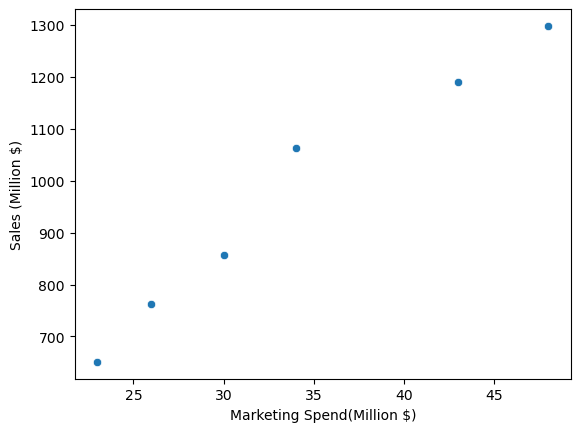

In [4]:
#Plotting a scatter plot to visualize the data
sns.scatterplot(data=data,x='Marketing Spend(Million $)',y='Sales (Million $)')

In [5]:
#Scaling the data between 0 and 1
scaler = MinMaxScaler()
data[['Marketing Spend(Million $)','Sales (Million $)']]=\
scaler.fit_transform(data[['Marketing Spend(Million $)','Sales (Million $)']])

In [6]:
data

,Marketing Spend(Million $),Sales (Million $)
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076
5,1.00,1.000000


<Axes: xlabel='Marketing Spend(Million $)', ylabel='Sales (Million $)'>

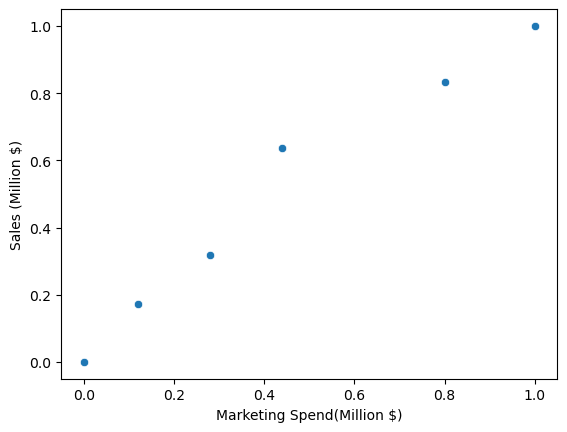

In [9]:
#Plotting a scatter plot
sns.scatterplot(data=data,x='Marketing Spend(Million $)',y='Sales (Million $)')

### Building the Linear Regression Model

In [10]:
#Read the data
X = data['Marketing Spend(Million $)'].values.reshape(-1,1)
y = data['Sales (Million $)'].values.reshape(-1,1)

In [11]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [12]:
#Predictions
y_pred = reg.predict(X)
y_pred

array([[0.05907859],
       [0.17743302],
       [0.33523892],
       [0.49304482],
       [0.8481081 ],
       [1.04536548]])

In [13]:
r2_score(y,y_pred)

0.9652190930694494

In [14]:
#Residual Sum of Squares
rss = np.sum(np.square(y-y_pred))
print(rss)
mse = mean_squared_error(y,y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

0.026808307381756883
0.004468051230292814
0.06684348308019873


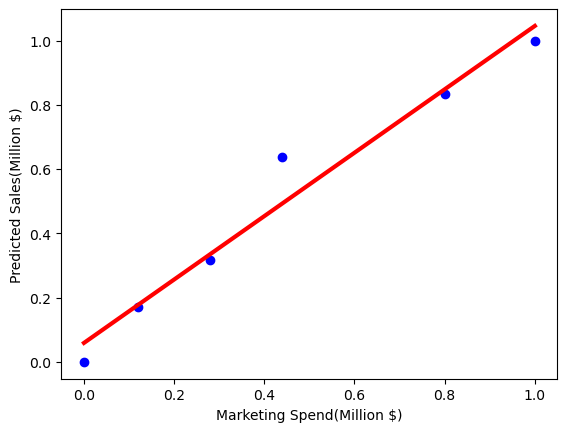

In [15]:
#Plot for predicted sales vs marketing spend
plt.scatter(X,y,color='blue')
plt.plot(X,y_pred,color='red',linewidth=3)
plt.xlabel('Marketing Spend(Million $)')
plt.ylabel('Predicted Sales(Million $)')
plt.show()

In [16]:
#To overfit we can fit polynomial features
X = data['Marketing Spend(Million $)'].values.reshape(-1,1)
print(X)

[[0.  ]
 [0.12]
 [0.28]
 [0.44]
 [0.8 ]
 [1.  ]]


In [17]:
poly = PolynomialFeatures(3)
Y = poly.fit_transform(X)
print(Y)

[[1.       0.       0.       0.      ]
 [1.       0.12     0.0144   0.001728]
 [1.       0.28     0.0784   0.021952]
 [1.       0.44     0.1936   0.085184]
 [1.       0.8      0.64     0.512   ]
 [1.       1.       1.       1.      ]]


In [18]:
#Building the polynomial regression model with degree 5
degree =5
polyreg5 =PolynomialFeatures(5)
X_poly5 = polyreg5.fit_transform(X)
linreg5 = LinearRegression()
linreg5.fit(X_poly5,y)

LinearRegression()

In [23]:
data.head()

,Marketing Spend(Million $),Sales (Million $)
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076


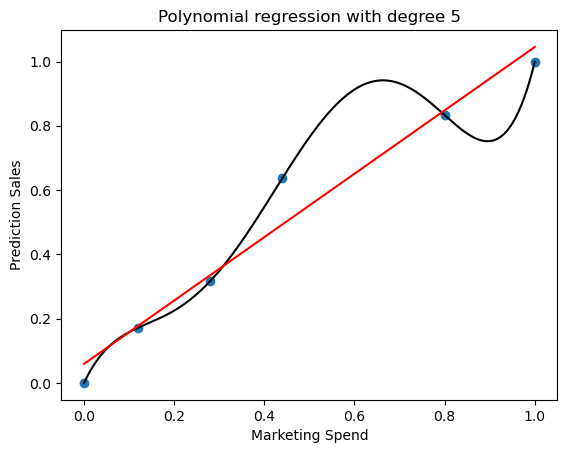

In [34]:
#Plotting the polynomial regression(5)
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,linreg5.predict(polyreg5.fit_transform(X_seq)),color='black')
plt.plot(X_seq,reg.predict(X_seq),color='red')
plt.title('Polynomial regression with degree 5')
plt.xlabel('Marketing Spend')
plt.ylabel('Prediction Sales')
plt.show()

In [35]:
y_pred5 = linreg5.predict(polyreg5.fit_transform(X))
print(r2_score(y,y_pred5))

1.0


In [36]:
#Residual Sum of Squares
rss = np.sum(np.square(y-y_pred5))
print(rss)
mse = mean_squared_error(y,y_pred5)
print(mse)
rmse = mse**0.5
print(rmse)

1.6288128800067282e-28
2.714688133344547e-29
5.2102669157582964e-15


### Ridge Regression

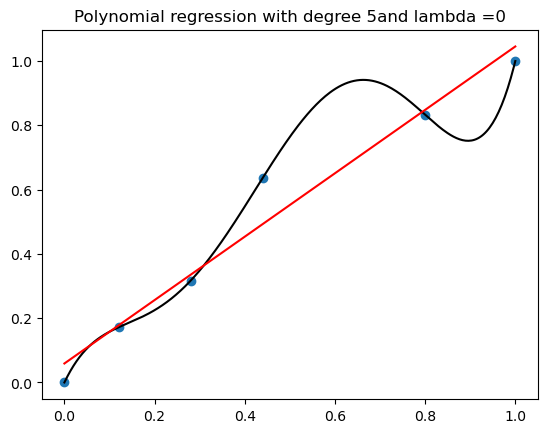

r2 score=1.0
[[  0.           2.94295226 -19.85351777  71.18543313 -95.27426562
   41.99939801]]


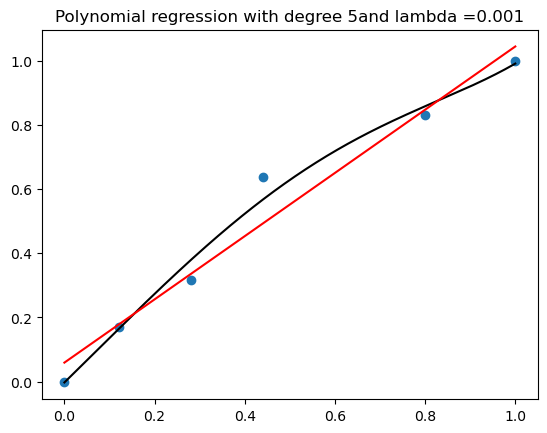

r2 score=0.9877944050899672
[[ 0.          1.3870223   0.12292763 -0.68649391 -0.38094524  0.55241207]]


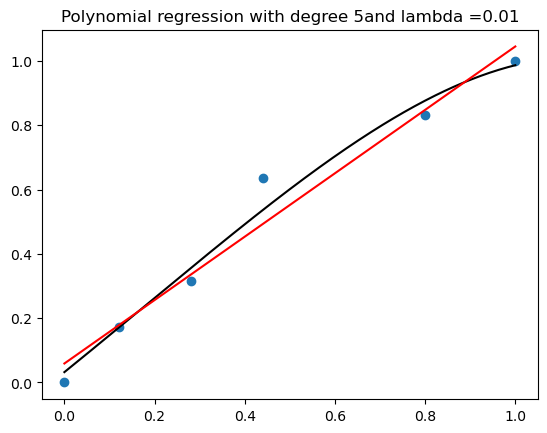

r2 score=0.9809539612050426
[[ 0.          1.13560973  0.13020587 -0.17959473 -0.14842149  0.01704645]]


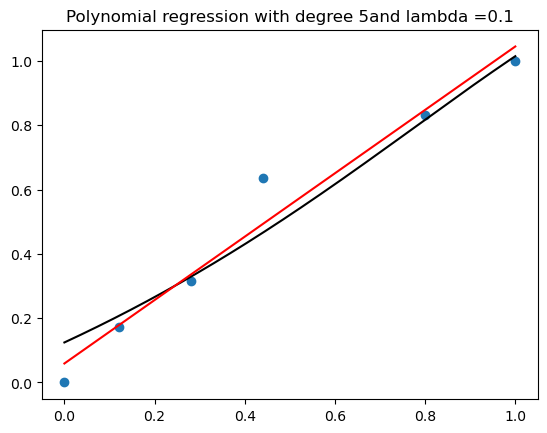

r2 score=0.9396437428481395
[[ 0.          0.65027964  0.2651751   0.07110798 -0.02396289 -0.07201942]]


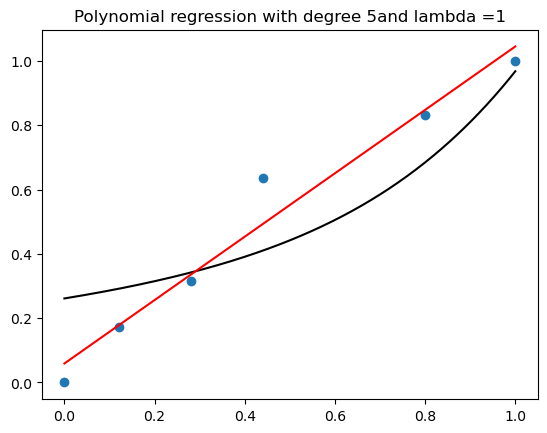

r2 score=0.7953946450161844
[[0.         0.22867197 0.16688081 0.12627838 0.10086186 0.08408679]]


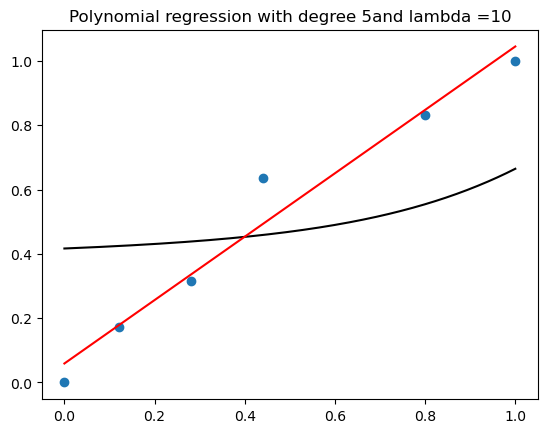

r2 score=0.3849505189364377
[[0.         0.0571764  0.05346191 0.0489761  0.04550657 0.04291024]]


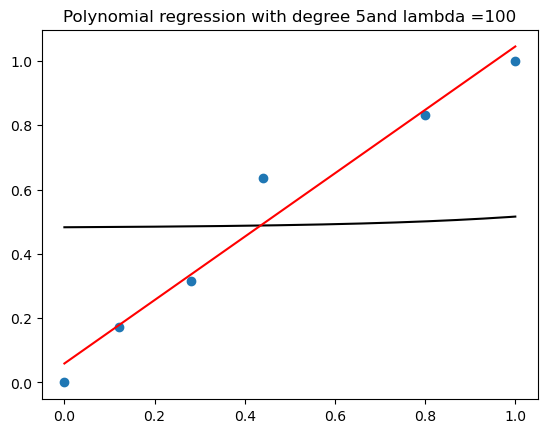

r2 score=0.05859088028960113
[[0.         0.00729918 0.00707285 0.00662207 0.00624288 0.00594789]]


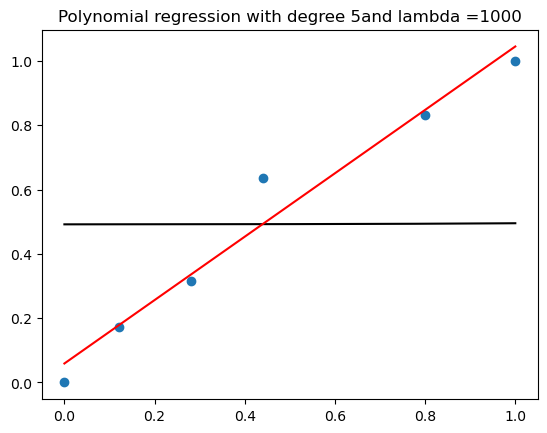

r2 score=0.006166338591997
[[0.         0.00075179 0.0007312  0.00068611 0.00064776 0.00061778]]


In [37]:
#Applying Ridge Regression with varying parameter lambda
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
lambdas = [0,0.001,0.01,0.1,1,10,100,1000]

for i in lambdas:
    degree =5
    ridgecoef = PolynomialFeatures(degree)
    X_poly = ridgecoef.fit_transform(X)
    ridgereg = Ridge(alpha=i)
    ridgereg.fit(X_poly,y)
    
    #Plotting the ridge regression for each lambda
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,ridgereg.predict(ridgecoef.fit_transform(X_seq)),color='black')
    plt.plot(X_seq,reg.predict(X_seq),color='red')
    plt.title('Polynomial regression with degree '+str(degree)+'and lambda ='+str(i))
    plt.show()
    
    #Computing the r2_score
    y_pred = ridgereg.predict(ridgecoef.fit_transform(X))
    print("r2 score="+str(r2_score(y,y_pred)))
    print(ridgereg.coef_)

### Lasso Regression

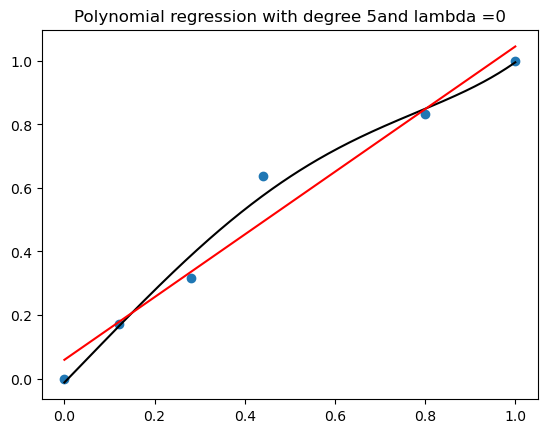

r2 score=0.9882107530558196
[ 0.          1.46152502  0.16901155 -1.08666253 -0.14086504  0.60488725]


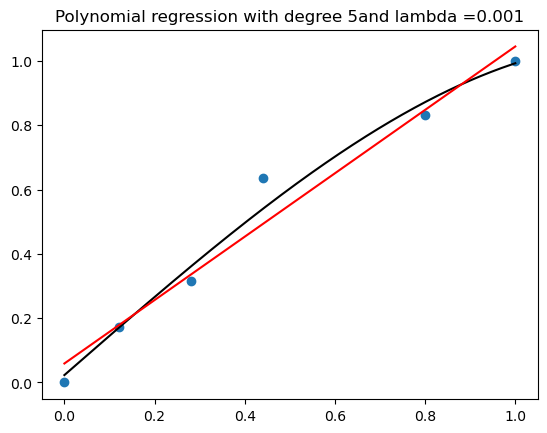

r2 score=0.9826605659196856
[ 0.          1.22414556 -0.         -0.25396979 -0.         -0.        ]


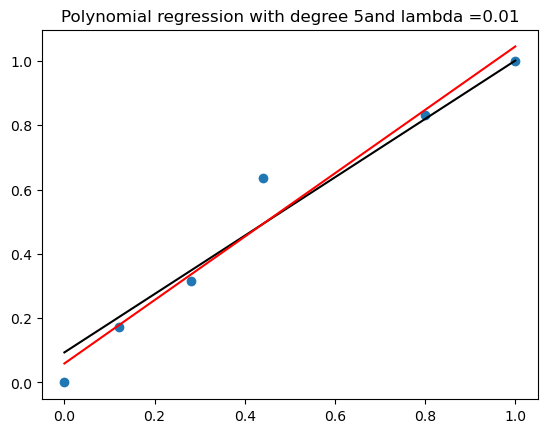

r2 score=0.9591121182494984
[0.       0.907835 0.       0.       0.       0.      ]


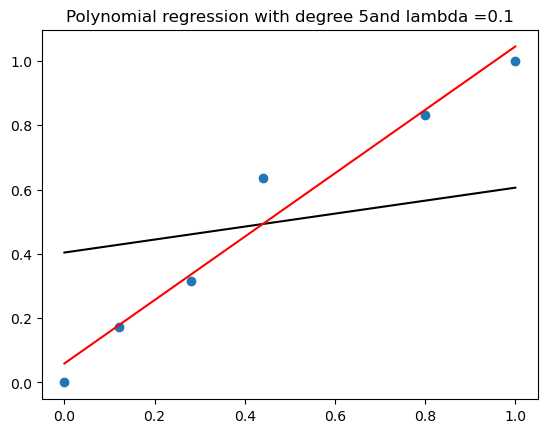

r2 score=0.3545216110743441
[0.         0.20176806 0.         0.         0.         0.        ]


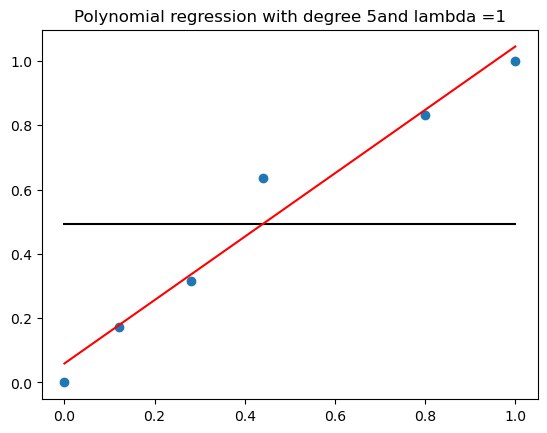

r2 score=0.0
[0. 0. 0. 0. 0. 0.]


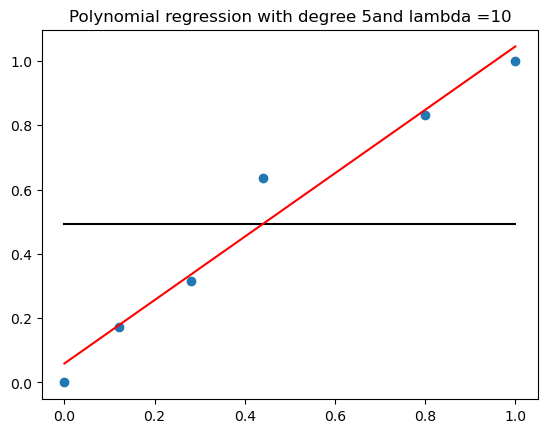

r2 score=0.0
[0. 0. 0. 0. 0. 0.]


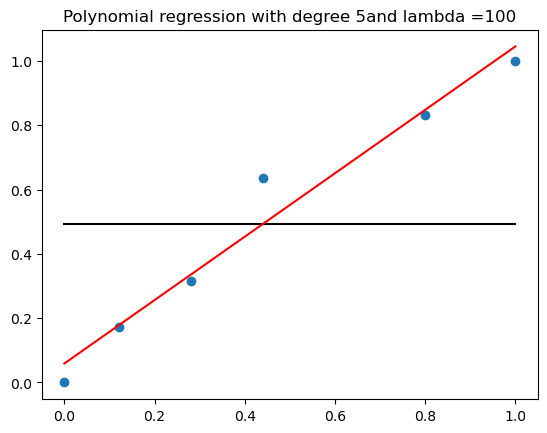

r2 score=0.0
[0. 0. 0. 0. 0. 0.]


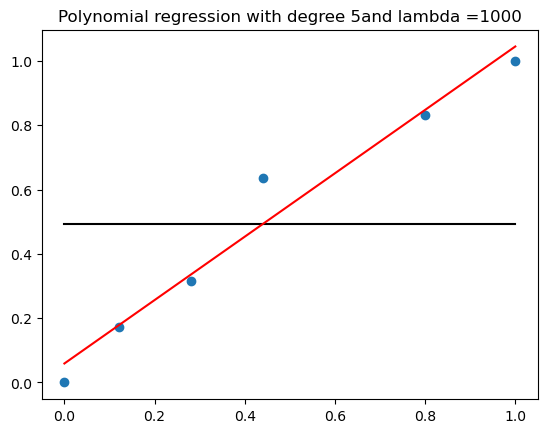

r2 score=0.0
[0. 0. 0. 0. 0. 0.]


In [38]:
#Applying Ridge Regression with varying parameter lambda
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
lambdas = [0,0.001,0.01,0.1,1,10,100,1000]

for i in lambdas:
    degree =5
    lassocoef = PolynomialFeatures(degree)
    X_poly = lassocoef.fit_transform(X)
    lassoreg = Lasso(alpha=i)
    lassoreg.fit(X_poly,y)
    
    #Plotting the ridge regression for each lambda
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq,lassoreg.predict(lassocoef.fit_transform(X_seq)),color='black')
    plt.plot(X_seq,reg.predict(X_seq),color='red')
    plt.title('Polynomial regression with degree '+str(degree)+'and lambda ='+str(i))
    plt.show()
    
    #Computing the r2_score
    y_pred = lassoreg.predict(lassocoef.fit_transform(X))
    print("r2 score="+str(r2_score(y,y_pred)))
    print(lassoreg.coef_)